### Nama : Kurniawan Eko Putra
### Kelas : Instrumentasi 5A
### NPT : 41.21.0015

## LATIHAN 1 - CALIFORNIA HOUSING DATASET

### Tentang Dataset :
Dataset California Housing adalah dataset yang berisi tentang informasi perumahan di daerah California, Amerika Serikat berdasarkan sensus 1990.

#### Kolom pada Dataset :
- Longitude : sebuah ukuran seberapa jauh sebuah rumah berada di barat; nilai yang lebih negatif menunjukkan posisi yang lebih jauh ke barat.
- Latitude : Sebuah ukuran seberapa jauh sebuah rumah berada di utara; nilai yang lebih tinggi menunjukkan posisi yang lebih jauh ke utara.
- housingMedianAge : Usia median sebuah rumah dalam satu blok; angka yang lebih rendah menandakan bangunan yang lebih baru
- totalRooms : Jumlah total ruangan dalam satu blok.
- totalBedrooms : Jumlah total kamar tidur dalam satu blok.
- Population : Jumlah total penduduk yang tinggal dalam satu blok.
- Households : Jumlah total rumah tangga, yakni sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok.
- medianIncome : Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar Amerika)
- medianHouseValue : Harga rumah untuk rumah tangga dalam satu blok (diukur dalam Dolar Amerika).

#### Variabel Target : medianHouseValue




### Import Library

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Membaca Dataset

In [45]:
data = pd.read_csv("input/housingCalifornia.csv")

### Mencari informasi jumlah baris dan kolom dari dataset

In [46]:
print("Jumlah baris dan kolom {}".format(data.shape))
print("Nama kolom : \n {}".format(data.columns))

Jumlah baris dan kolom (20640, 10)
Nama kolom : 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


### Mencetak info dan deskripsi dari dataset

In [47]:
print(data.info())
print('\n')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.1359

### Cek Apakah Ada Data yang Hilang atau Tidak

In [48]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dari hasil di atas diketahui bahwa ada 207 data pada kolom total_bedrooms yang hilang/null

### Menampilkan statistik dari kolom data yang hilang

In [49]:
print ("Total_bedrooms column Mode is  "+str(data["total_bedrooms"].mode())+"\n")
print(data["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
Name: total_bedrooms, dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


### Mengisi nilai yang hilang (missing values) dalam satu kolom data menggunakan imputer

In [50]:
imputer = SimpleImputer(strategy ="median")
imputer.fit(data.iloc[:,4:5])
data.iloc[:,4:5] = imputer.transform(data.iloc[:,4:5])

### Cek Kembali Apakah ada Data yang Hilang atau Tidak

In [51]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Dari hasil di atas dapat dilihat bahwa sudah tidak ada missing value lagi

### Visualisasi Data dari Setiap Kolom pada Dataset

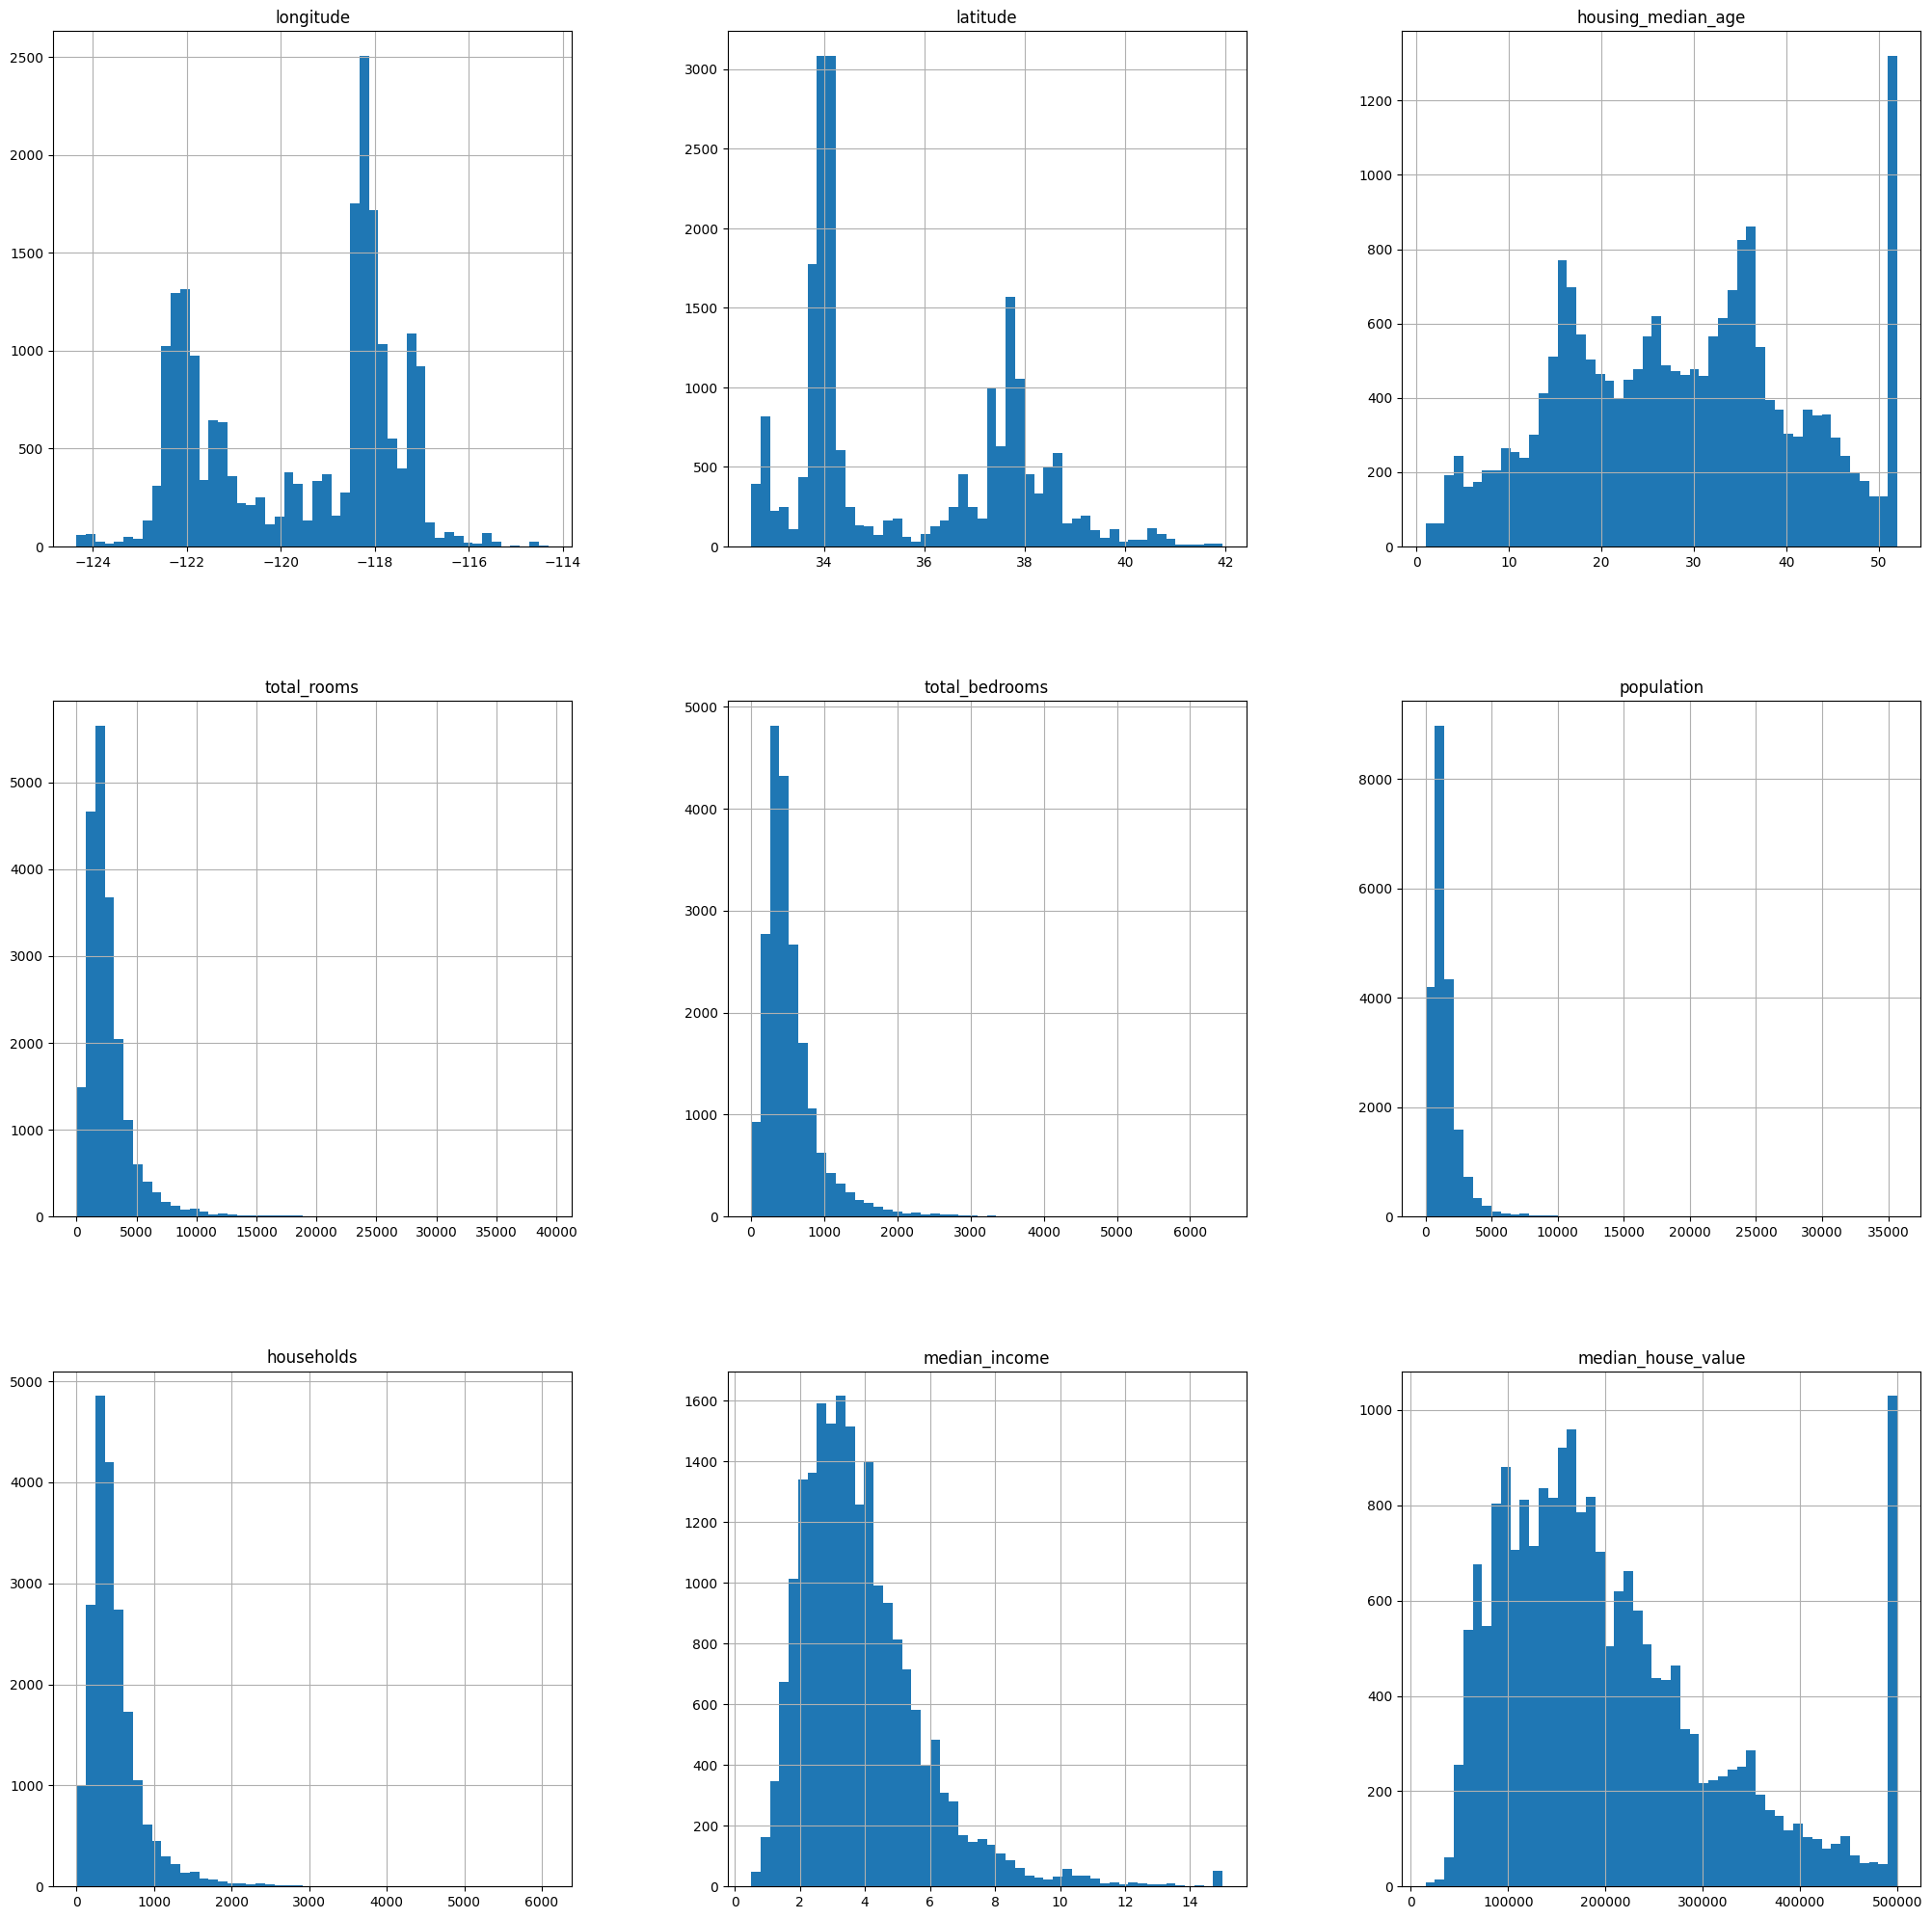

In [52]:
data.hist(figsize=(25,25),bins=50);

### Membuat Heatmap untuk Mencari Korelasi antar Variabel/Kolom pada Dataset

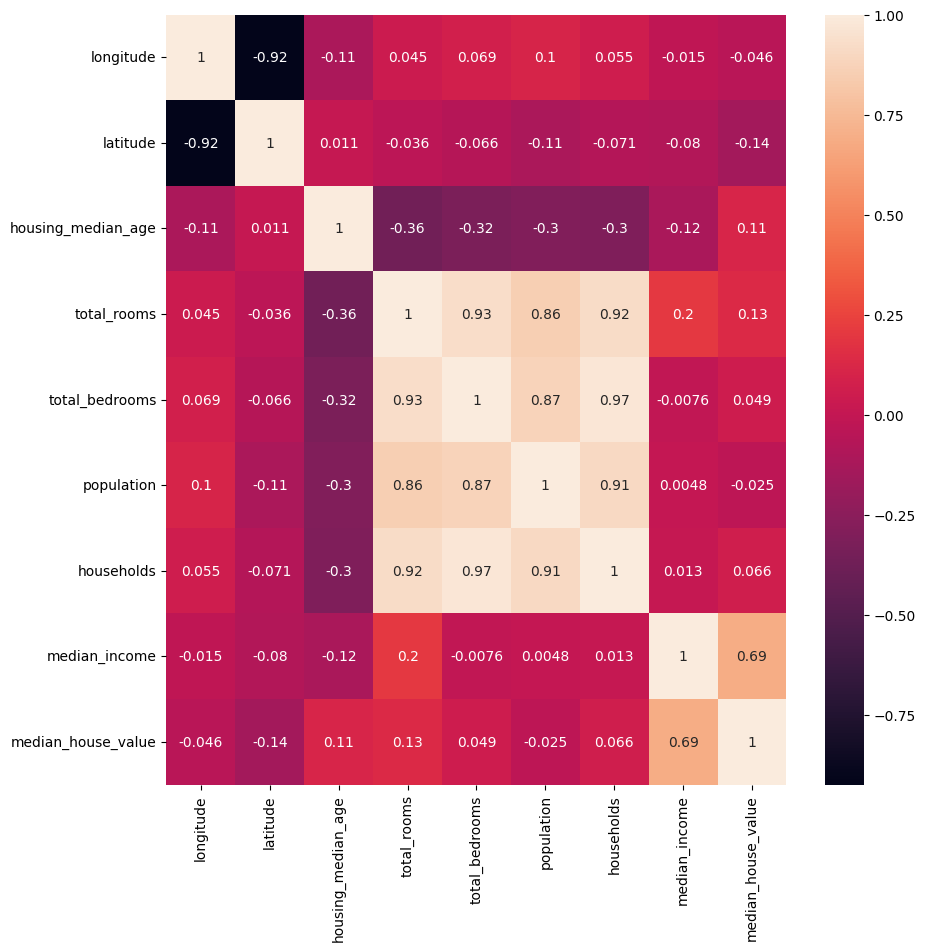

In [53]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

### Mencari Outliers pada Dataset


Outliers merujuk pada titik atau nilai dalam dataset yang secara signifikan berbeda dari mayoritas nilai-nilai lainnya. Secara umum, outliers adalah nilai yang jauh dari nilai-nilai lain dalam kumpulan data yang sama.

In [54]:
def getOutliers(dataframe,column):
    column = "total_rooms" 

    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
  
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(data[column].size,len(data[column])))
  
    outlierRemoved = data[~data[column].isin(data[column])]
    return outlierRemoved

### Menghapus Outliers

In [55]:
df_outliersRemoved = getOutliers(data,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 1287 are 
 1287


### Label Encoding


Label encoding merupakan salah satu teknik dalam preprocessing data yang digunakan untuk mengubah nilai-nilai pada fitur kategori menjadi nilai numerik. Teknik ini sering digunakan pada fitur kategori (categorical features) di mana nilai-nilai tersebut tidak memiliki urutan atau tingkatan yang sebenarnya, tetapi hanya berupa label atau kategori.

In [56]:
labelEncoder = LabelEncoder()
print(data["ocean_proximity"].value_counts())
data["ocean_proximity"] = labelEncoder.fit_transform(data["ocean_proximity"])
data["ocean_proximity"].value_counts()
data.describe()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


### Memisahkan Variabel Independent dan Dependant

Variabel independen adalah variabel yang tak terikat, dimana variabel independen ini yang nantinya akan digunakan untuk memprediksi variabel target/variabel dependant

Sedangkan variabel dependant adalah variabel terikat, dimana value nya bergantung dengan nilai dari variabel independent

In [57]:
independentVariable = data.drop("median_house_value",axis=1)
print(independentVariable.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252                3  
1      2401.0      1138.0         8.3014                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3  


In [58]:
dependantVariable = data["median_house_value"]
print("Median Housing Values")
print(dependantVariable.head())

Median Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


### Membagi Dataset ke Dalam 2 bagian, yakni untuk training dan testing

In [59]:
X_train,X_test,y_train,y_test = train_test_split(independentVariable,dependantVariable,test_size=0.2,random_state=42)

### Standarisasi Data

Standardisasi Data dilakukan untuk membawa semua variabel independen ke dalam skala yang sama, untuk mencegah variabel mana pun yang mendominasi model

In [60]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

### Membuat Model Prediksi dengan Menggunakan Regresi Linear

In [61]:
linearRegModel = LinearRegression(n_jobs=-1)
linearRegModel.fit(X_train,y_train)


LinearRegression(n_jobs=-1)

### Melakukan Prediksi Terhadap Data Testing

In [62]:
y_pred = linearRegModel.predict(X_test)

### Visualisasi Hasil Prediksi

#### Menggunakan Diagram Garis

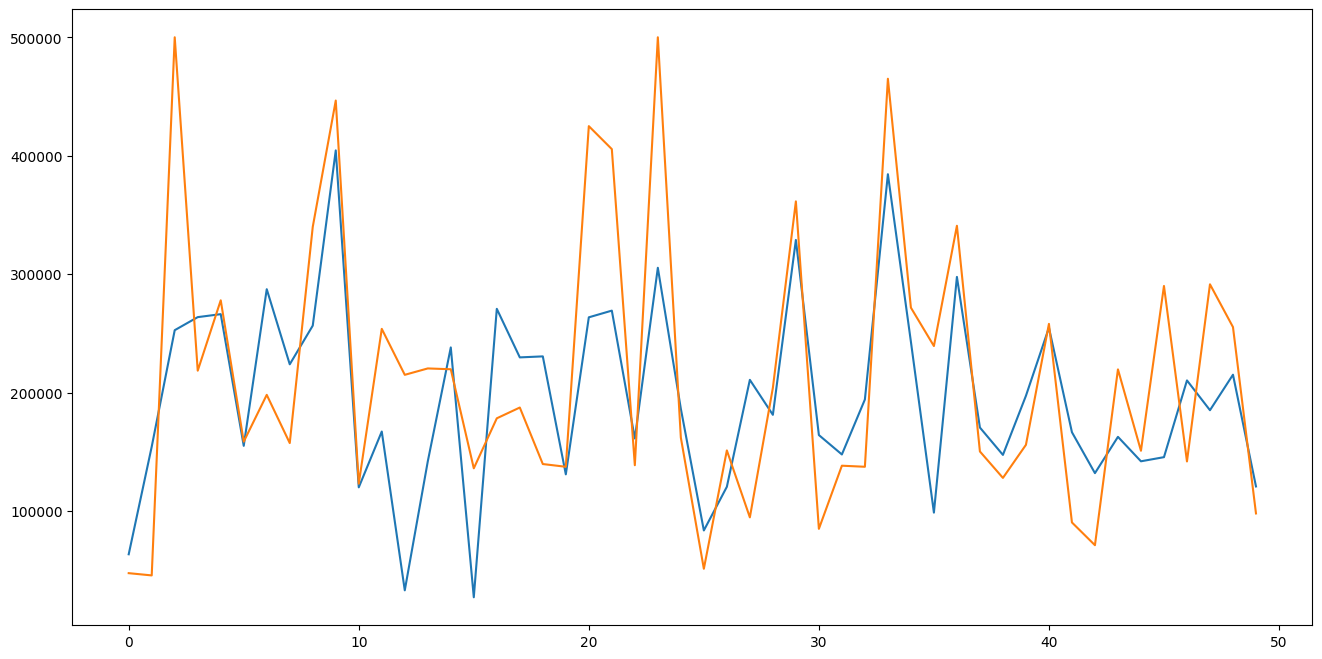

In [63]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])

#### Menggunakan Scatter Plot

Text(0, 0.5, ' Predicted median_house_value')

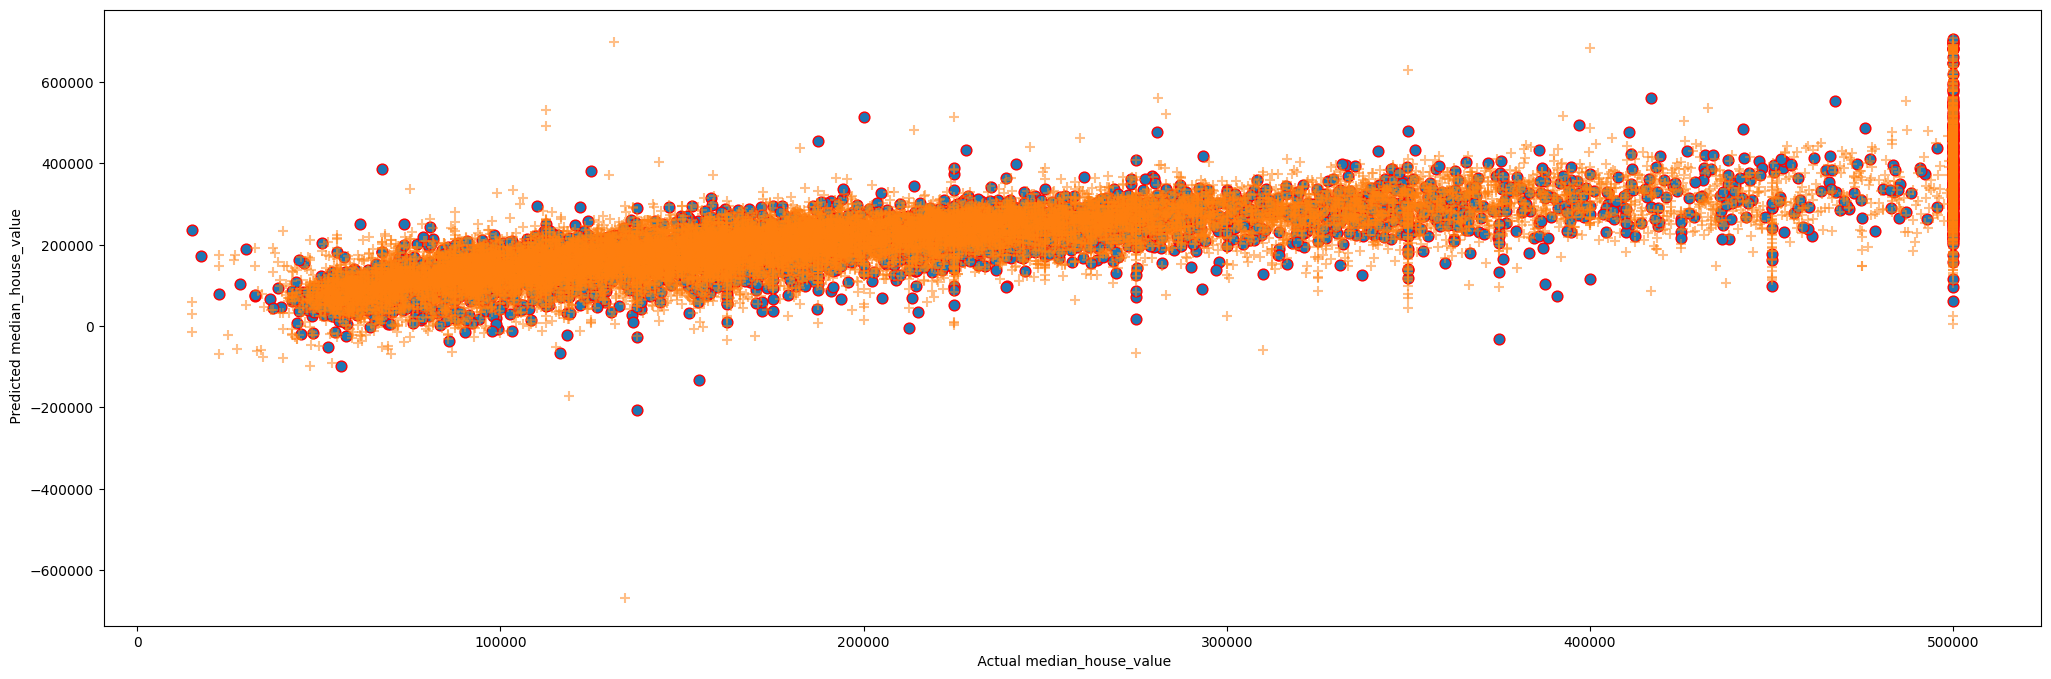

In [64]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,y_pred,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,linearRegModel.predict(X_train),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")